In [ ]:
#pip install ......

# Diabetes Dataset Description

## Overview
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.
This notebook provides a brief overview of the diabetes dataset sourced from the "diabetes_012_health_indicators_BRFSS2015.csv" file. The dataset encompasses various health indicators related to diabetes and associated factors. The columns in the dataset are as follows:
| Column                   | Description                                            |
|--------------------------|--------------------------------------------------------|
| Diabetes_012             | Indicator for the presence of diabetes (No Diabetes, Pre-Diabetic, Diabetic).|
| HighBP                   | Binary indicator for blood pressure (Normal BP, High BP).     |
| HighChol                 | Binary indicator for cholesterol levels (Normal Cholesterol, High Cholesterol).        |
| CholCheck                | Binary indicator for cholesterol check (Not Checked, Checked).       |
| BMI                      | Body Mass Index (numeric).                              |
| Smoker                   | Binary indicator for smoking status (Non-Smoker, Smoker).           |
| Stroke                   | Binary indicator for history of stroke (No Stroke, Stroke).       |
| HeartDiseaseorAttack     | Binary indicator for history of heart disease or heart attack (No Heart Disease/Attack, Heart Disease/Attack). |
| PhysActivity             | Binary indicator for physical activity (Inactive, Active).       |
| Fruits                   | Numeric indicator for daily fruit consumption (No Fruits/Day, 1 or More Fruits/Day).         |
| Veggies                  | Numeric indicator for daily vegetable consumption (No Veggies/Day, 1 or More Veggies/Day).|
| HvyAlcoholConsump       | Binary indicator for heavy alcohol consumption (No Alcohol, Alcoholic).|
| AnyHealthcare            | Binary indicator for access to any healthcare (No Healthcare, Have Healthcare). |
| NoDocbcCost              | Binary indicator for no doctor visit due to cost (Cost is not an Issue, No Visit Due to Cost).    |
| GenHlth                  | Numeric indicator for general health status (Excellent, Very Good, Good, Fair, Poor).            |
| MentHlth                 | Numeric indicator for mental health status.             |
| PhysHlth                 | Numeric indicator for physical health status.           |
| DiffWalk                 | Binary indicator for difficulty in walking (No Difficulty, Yes have Difficulty).    |
| Sex                      | Binary indicator for gender (Female, Male).|
| Age                      | Numeric indicator for age (18-24 Years, 25-29 Years, ..., 80 Years or older).                             |
| Education                | Numeric indicator for education level (Never attended school..., College 4 years or more).                  |
| Income                   | Numeric indicator for income level (less than $10,000, ..., $75,000 or more).                     |


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import f_oneway

In [206]:
# reading data-2.csv into pandas df
df = pd.read_csv("Dataset/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [208]:
# description of numeric values of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [209]:
# looking for duplicate records in df
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                     

In [210]:
# dropping duplicate records from df
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

In [211]:
# print null values of each column
missing_values = pd.concat([df.isnull().sum(), (df.isnull().sum() / len(df) * 100)], axis=1, keys=['Missing Values', '% Missing']).sort_values(by='Missing Values', ascending=False)
print(missing_values)

                      Missing Values  % Missing
Diabetes_012                       0        0.0
HighBP                             0        0.0
Education                          0        0.0
Age                                0        0.0
Sex                                0        0.0
DiffWalk                           0        0.0
PhysHlth                           0        0.0
MentHlth                           0        0.0
GenHlth                            0        0.0
NoDocbcCost                        0        0.0
AnyHealthcare                      0        0.0
HvyAlcoholConsump                  0        0.0
Veggies                            0        0.0
Fruits                             0        0.0
PhysActivity                       0        0.0
HeartDiseaseorAttack               0        0.0
Stroke                             0        0.0
Smoker                             0        0.0
BMI                                0        0.0
CholCheck                          0    

<Axes: >

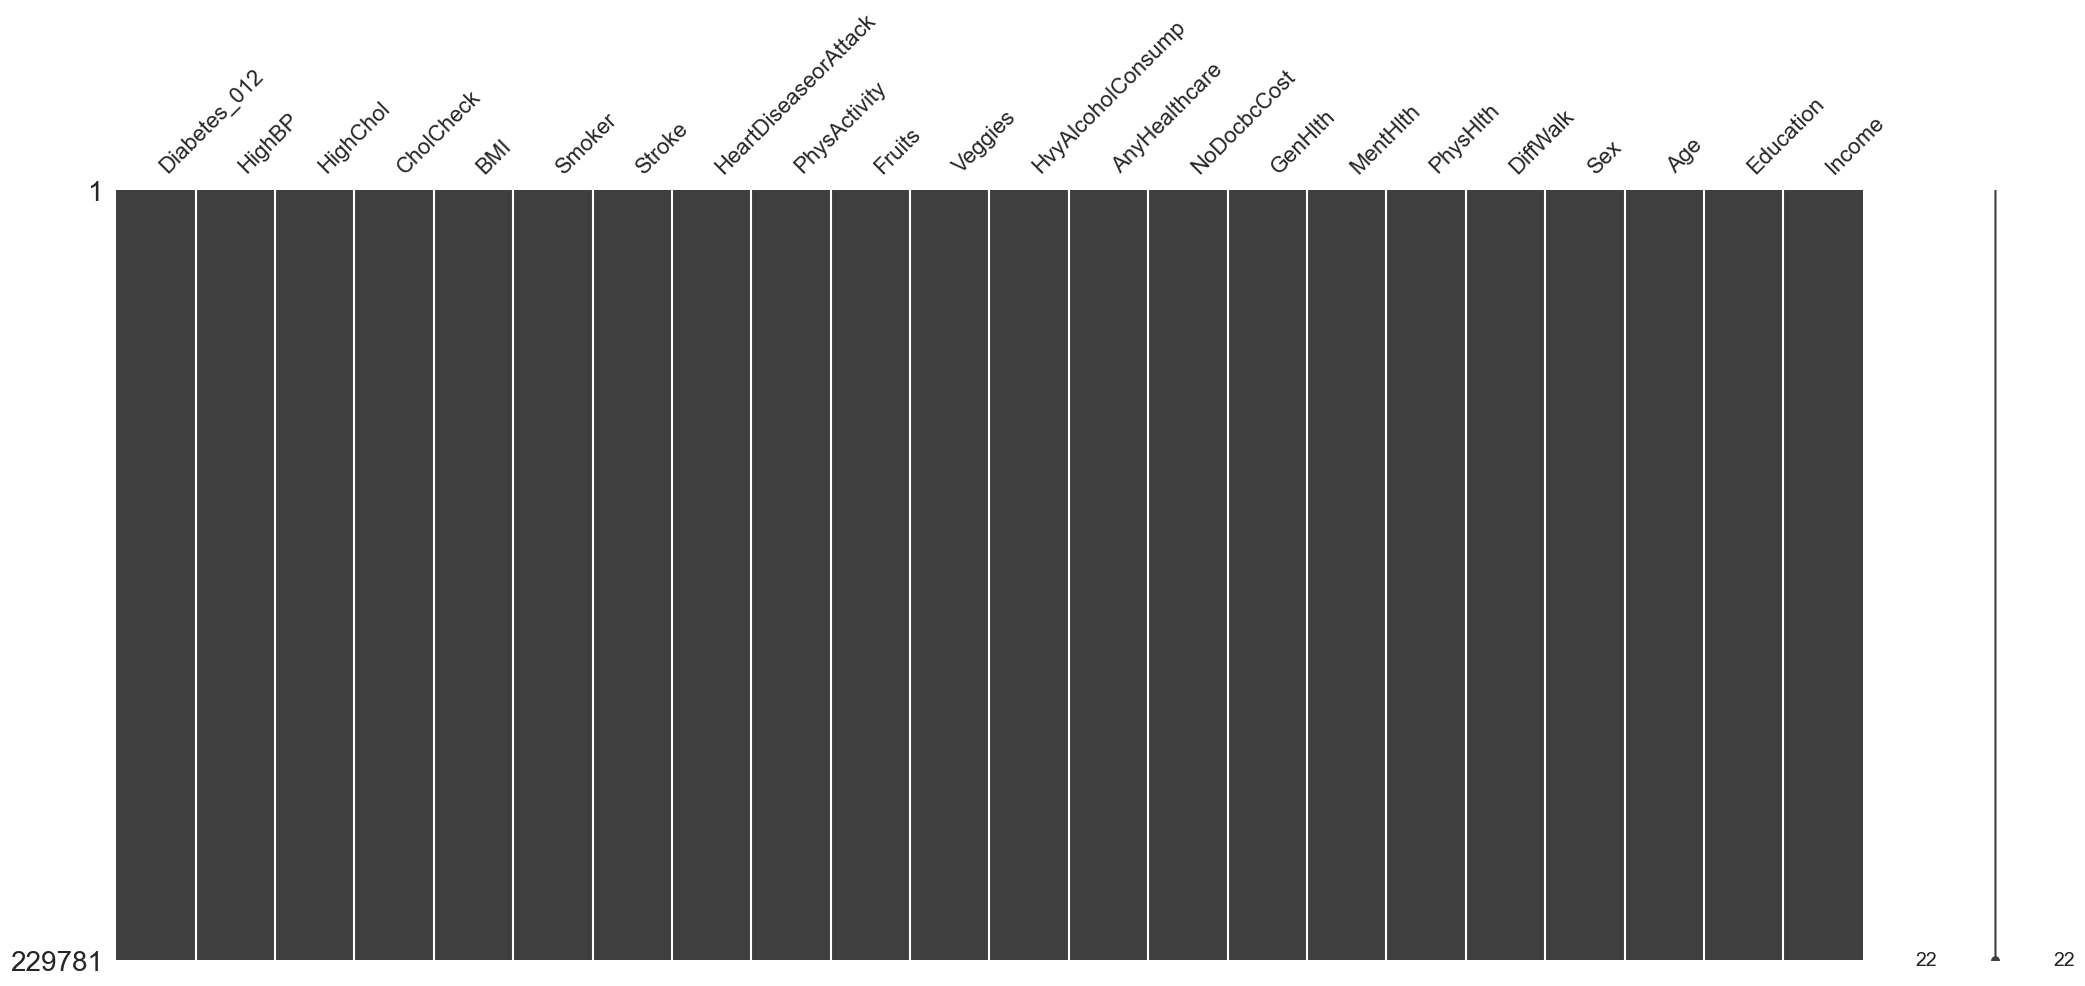

In [212]:
# another way of visualizing missing values
msno.matrix(df)

c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\n

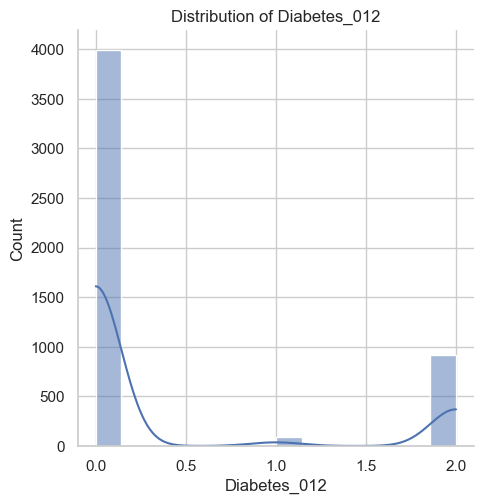

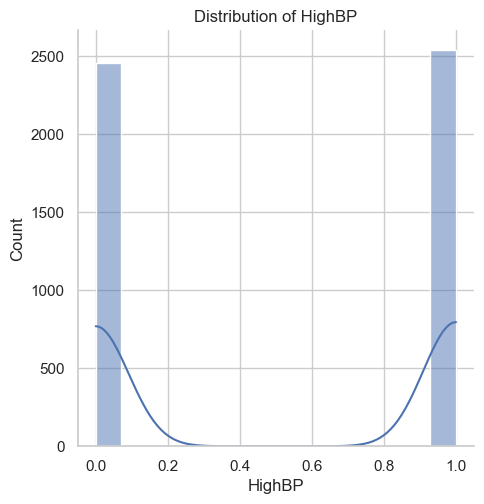

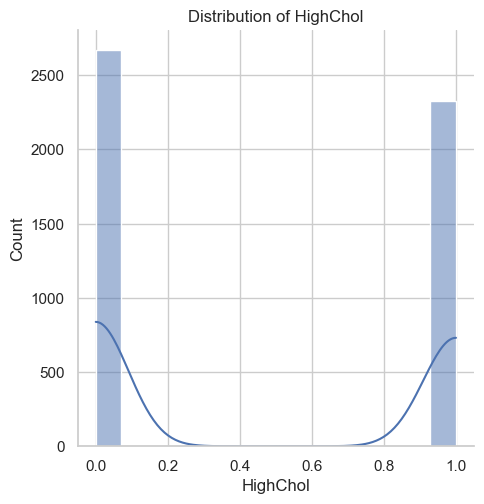

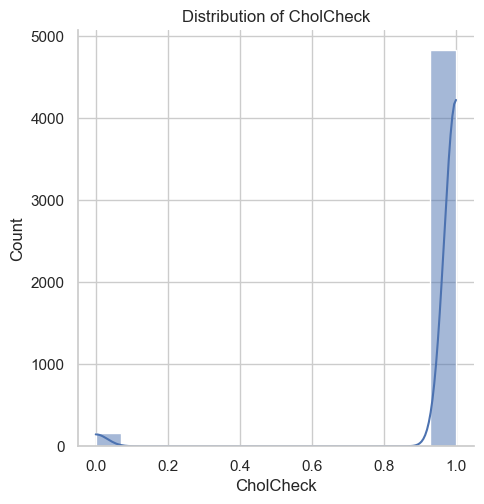

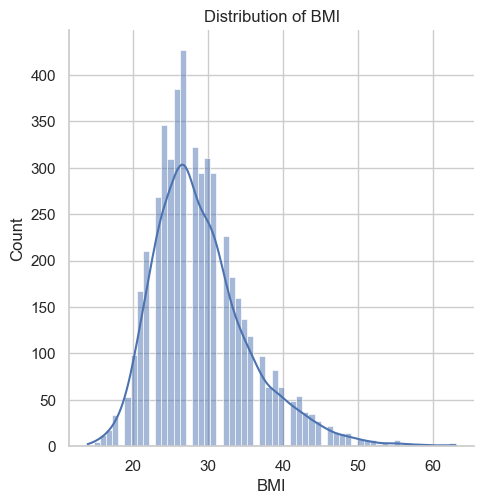

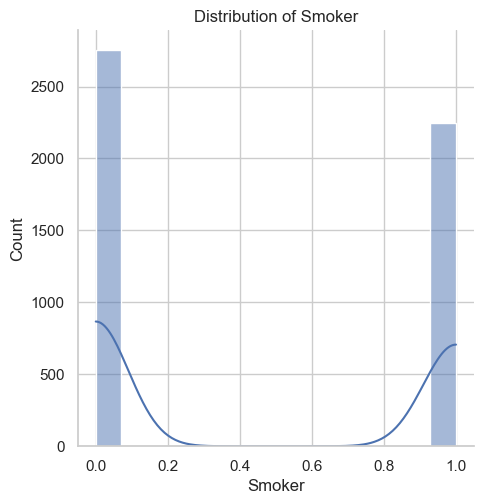

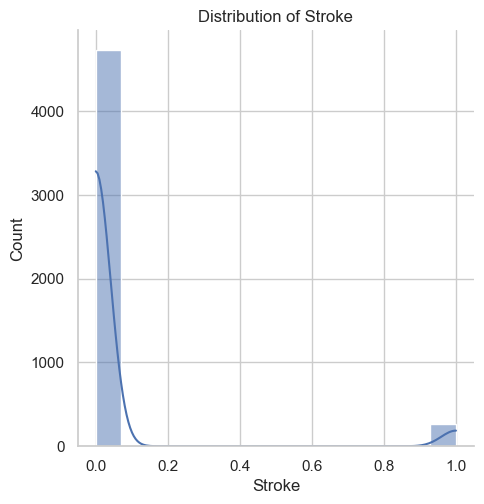

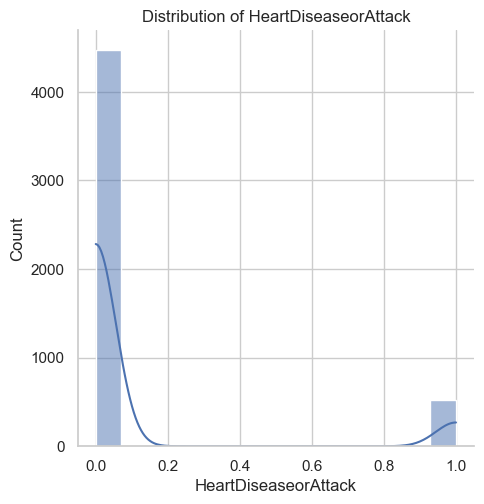

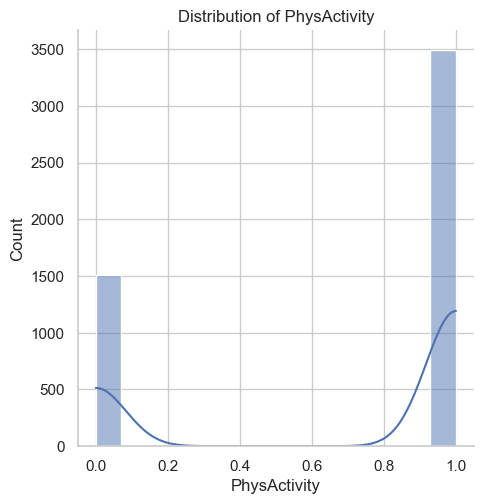

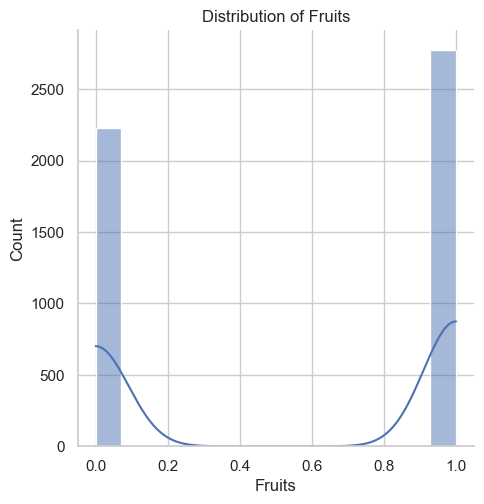

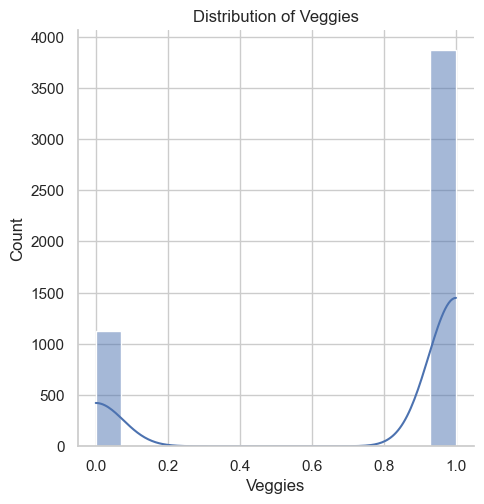

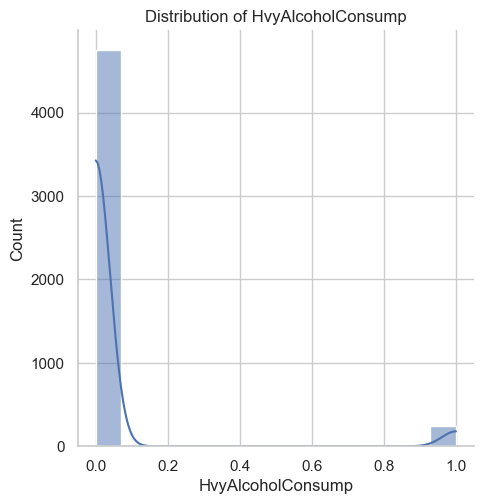

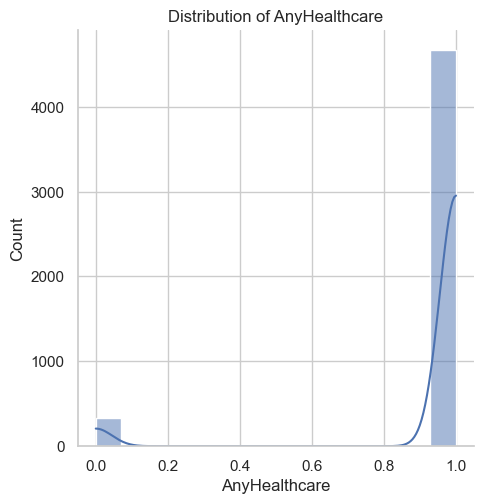

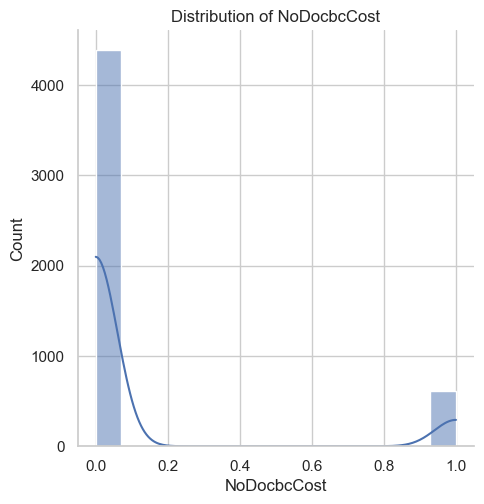

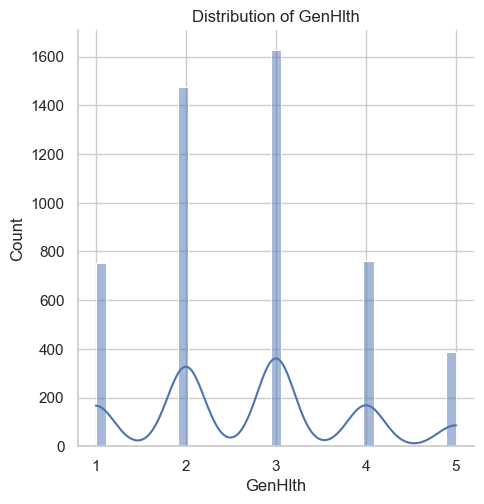

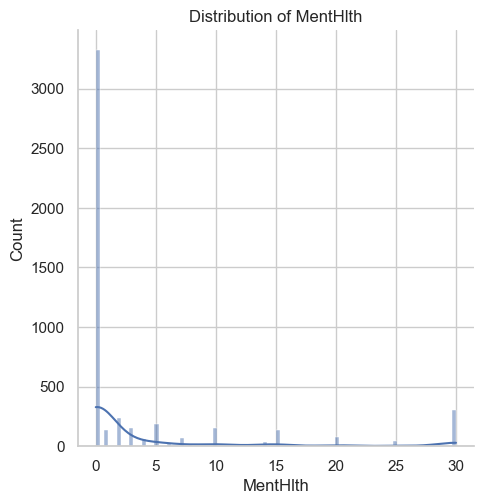

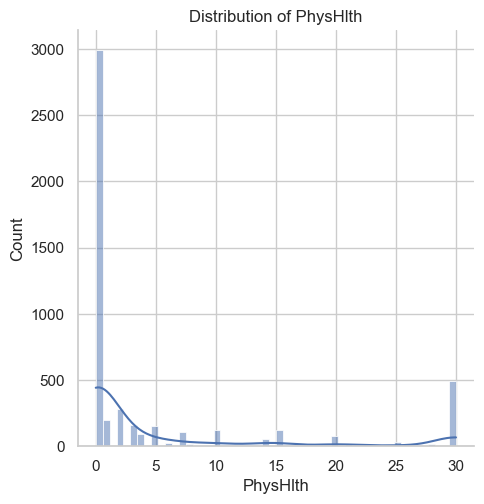

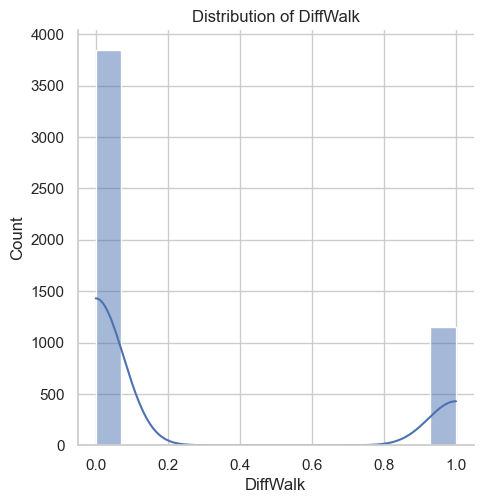

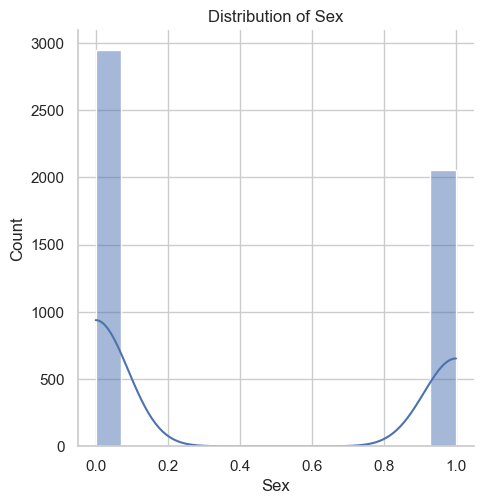

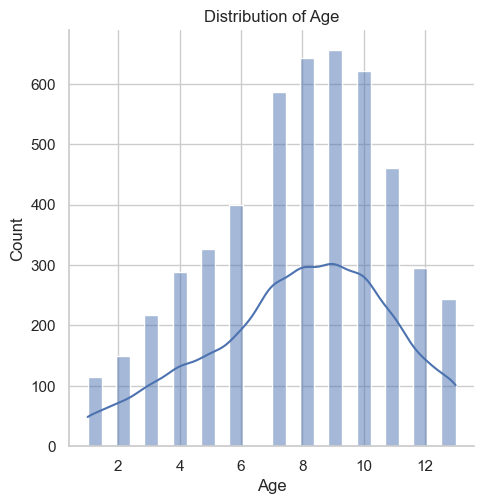

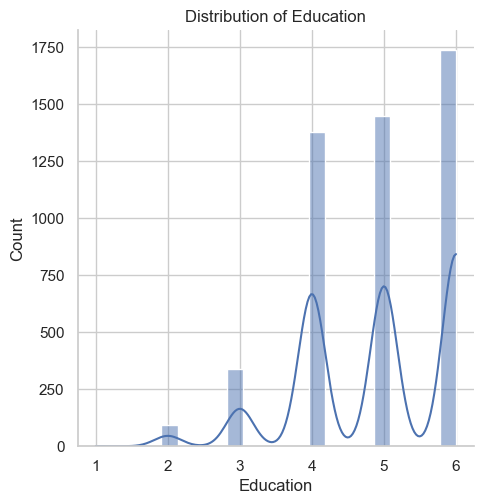

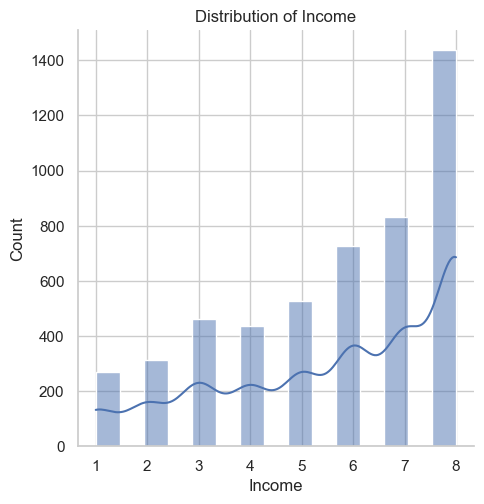

In [213]:
# ploting distubation of column data
col_names = df.columns.tolist()

for col in col_names:
    p = sns.displot(df[:5000], x=col, kde=True)
    plt.title(f"Distribution of {col}")


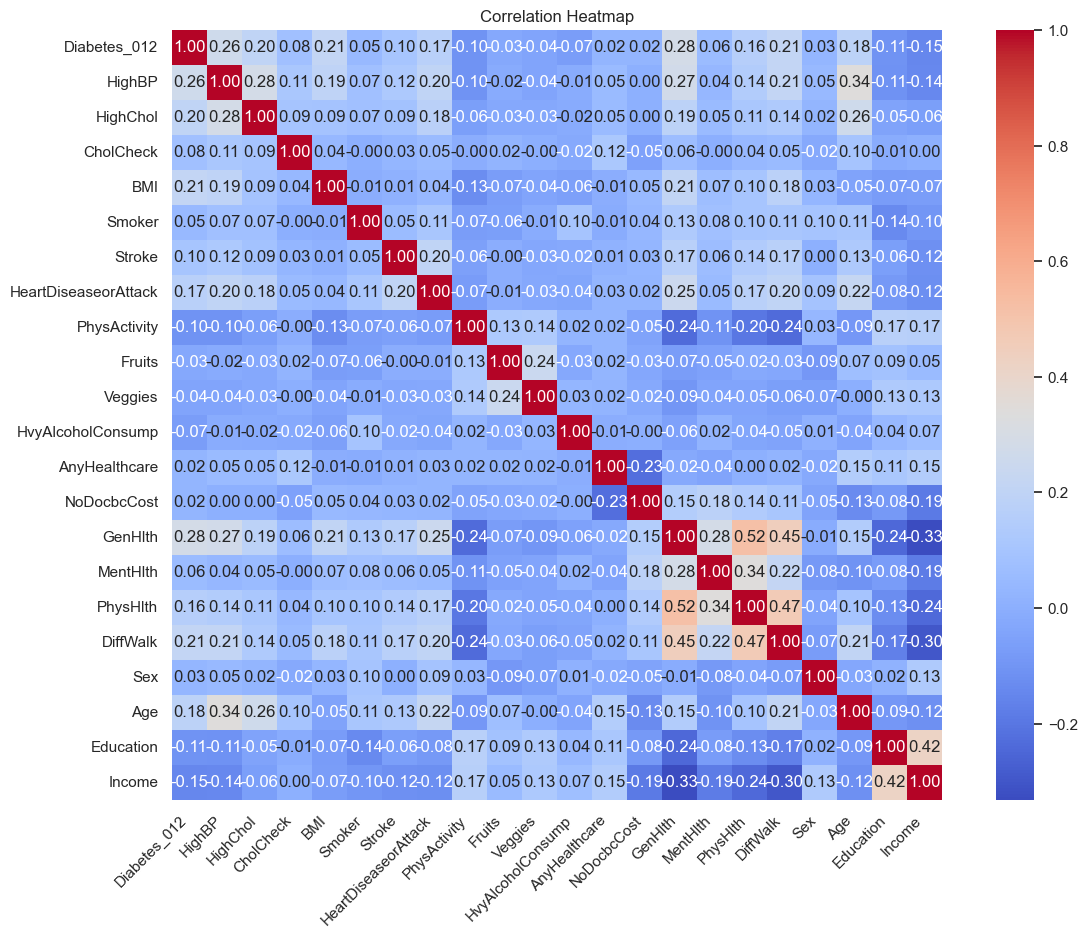

In [214]:
# heat map to check the correlation between columns
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
heatmap_check = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm", square=True)
heatmap_check.set_title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.show()

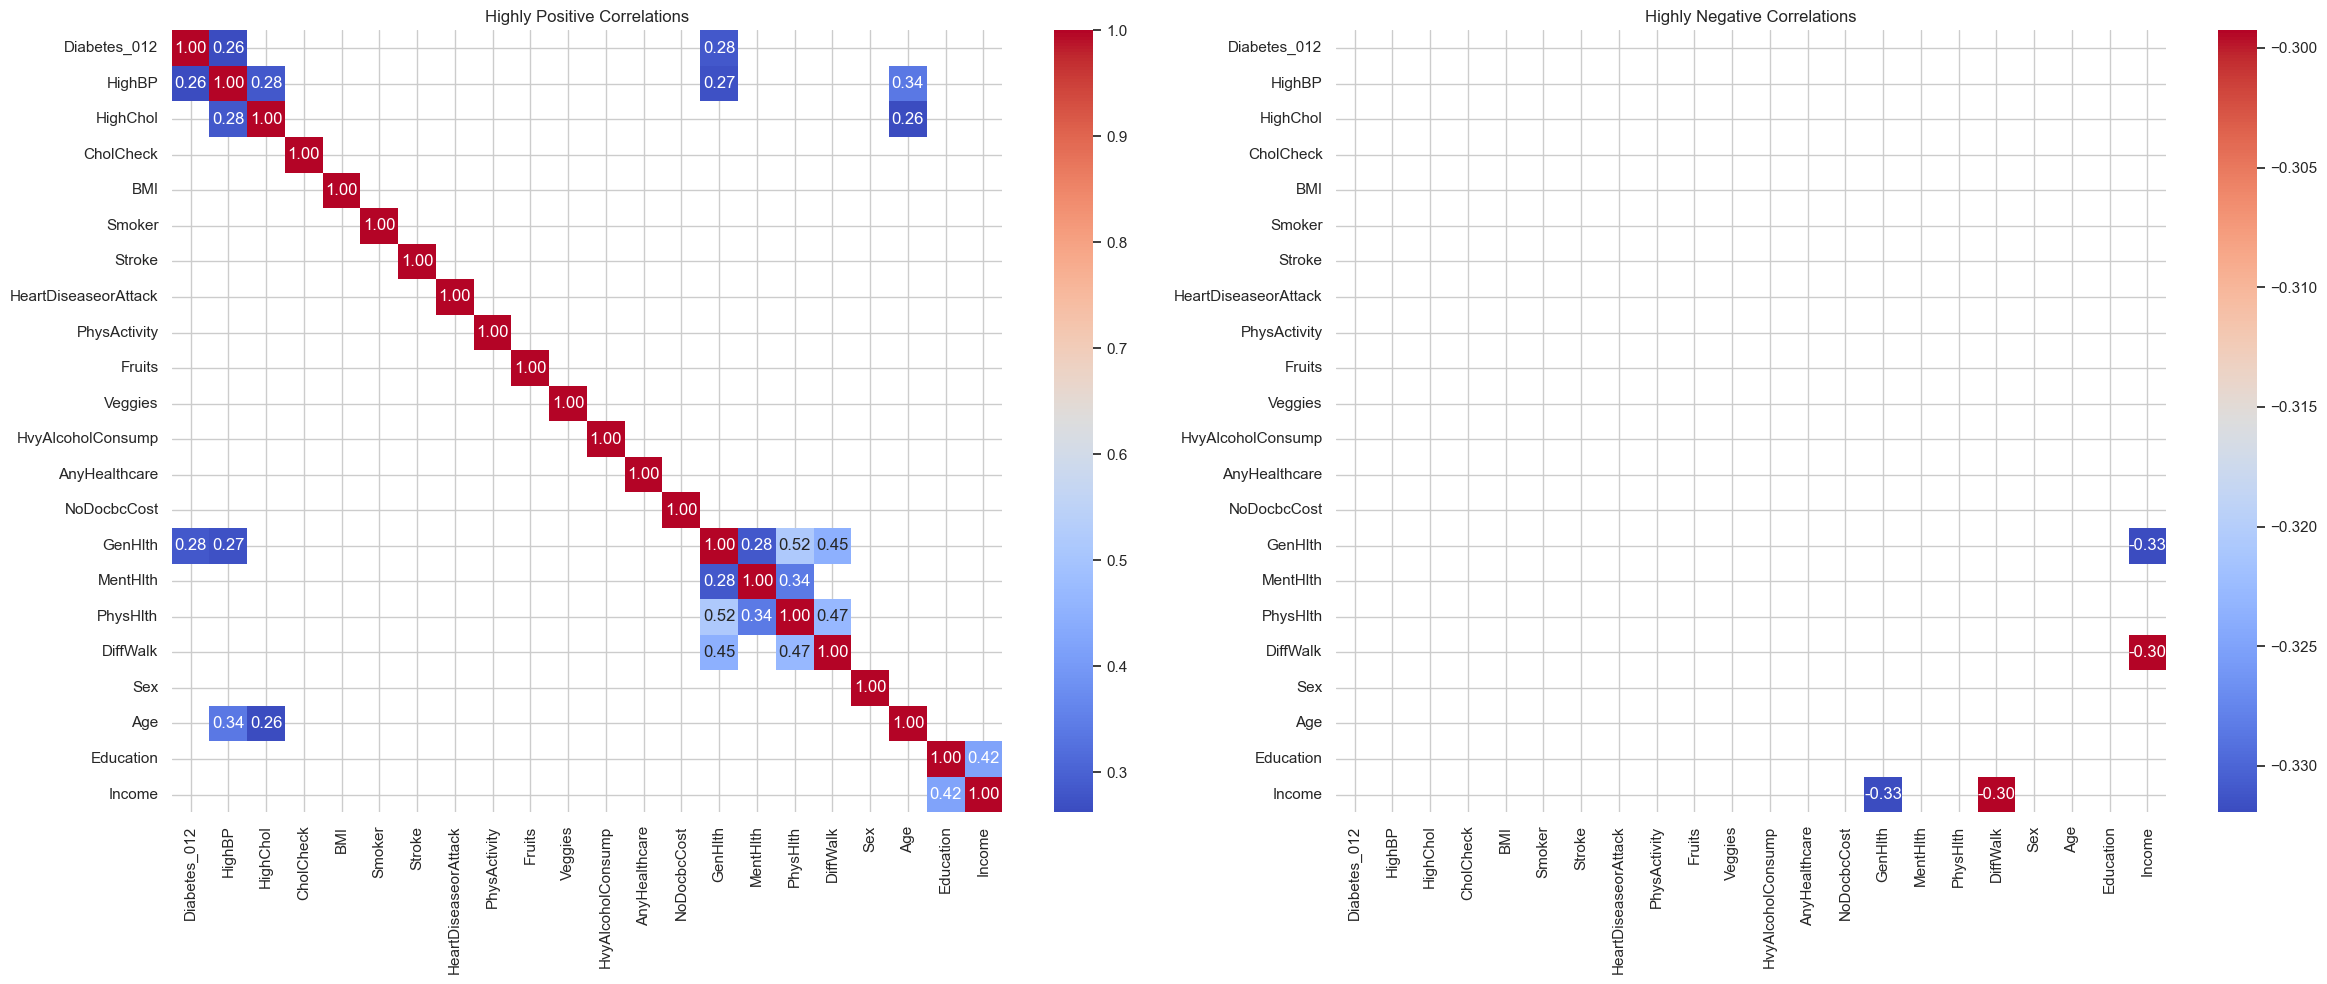

In [215]:
# Set correlation thresholds
positive_threshold, negative_threshold = 0.25, -0.25

# Create subplots for positive and negative correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Plot highly positive correlations
sns.heatmap(correlation_matrix[correlation_matrix > positive_threshold], annot=True, cmap="coolwarm", fmt=".2f", ax=ax1)
ax1.set_title("Highly Positive Correlations")

# Plot highly negative correlations
sns.heatmap(correlation_matrix[correlation_matrix < negative_threshold], annot=True, cmap="coolwarm", fmt=".2f", ax=ax2)
ax2.set_title("Highly Negative Correlations")

plt.tight_layout()
plt.show()

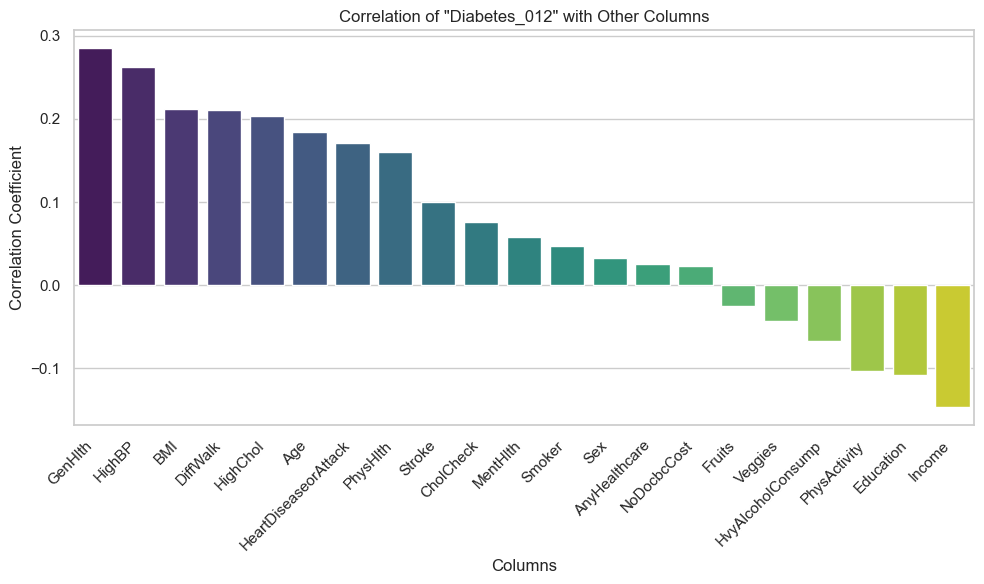

In [216]:
# Setting "Diabetes_012" as target
target_column = "Diabetes_012"

# Calculate the correlations of "Diabetes_012" with all other columns
correlations = df.corr()[target_column].sort_values(ascending=False)

# Exclude the "Diabetes_012" column from the correlations
correlations = correlations.drop(target_column, errors='ignore')

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title(f'Correlation of "{target_column}" with Other Columns')
plt.xlabel("Columns")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

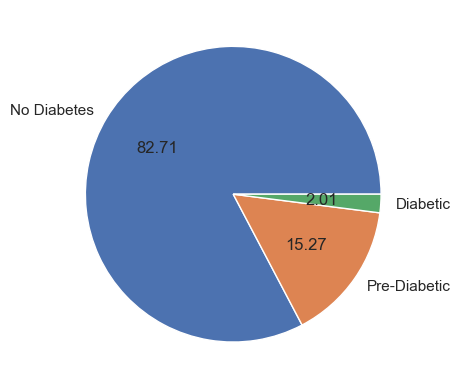

In [217]:
# plotting population of dataset  
labels=["No Diabetes","Pre-Diabetic", "Diabetic"]
plt.pie(df["Diabetes_012"].value_counts(), labels =labels, autopct='%.02f');

In [218]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [219]:
# String values for every column according to dataset description
column_mappings = {
    'Diabetes_012': {0.0: 'No Diabetes', 1.0: 'Pre-Diabetic', 2.0: 'Diabetic'},
    'HighBP': {0.0: 'Normal BP', 1.0: 'High BP'},
    'HighChol': {0.0: 'Normal Cholesterol', 1.0: 'High Cholesterol'},
    'CholCheck': {0.0: 'Not Checked', 1.0: 'Checked'},
    'Smoker': {0.0: 'Non-Smoker', 1.0: 'Smoker'},
    'Stroke': {0.0: 'No Stroke', 1.0: 'Stroke'},
    'HeartDiseaseorAttack': {0.0: 'No Heart Disease/Attack', 1.0: 'Heart Disease/Attack'},
    'PhysActivity': {0.0: 'Inactive', 1.0: 'Active'},
    'Fruits': {0.0: 'No Fruits/Day', 1.0: '1 or More Fruits/Day'},
    'Veggies': {0.0: 'No Veggies/Day', 1.0: '1 or More Veggies/Day'},
    'HvyAlcoholConsump': {0.0: 'No Alcohol', 1.0: 'Alcoholic'},
    'AnyHealthcare': {0.0: 'No Healthcare', 1.0: ' Have Healthcare'},
    'NoDocbcCost': {0.0: 'Cost is not Issue', 1.0: 'No Visit Due to Cost'},
    'GenHlth': {1.0: 'Excellent', 2.0: 'very good', 3.0: 'good', 4.0: 'fair', 5.0: 'poor'},
    'DiffWalk': {0.0: 'No Difficulty', 1.0: 'Yes have Difficulty'},
    'Sex': {0.0: 'Female', 1.0: 'Male'},
    'Age': {1.0: '18-24 Years', 2.0: '25-29 Years', 3.0: '30-34 Years', 4.0: '35-39 Years', 5.0: '40-44 Years', 6.0: '44-49 Years',
            7.0: '50-54 Years', 8.0: '55-59 Years', 9.0: '60-64 Years', 10.0: '65-69 Years', 11.0: '70-74 Years', 12.0: '75-79 Years', 13.0: '80 Years or older'},
    'Education': {1.0: 'Never attended school or only kindergarten', 2.0: 'Grades 1 through 8 (Elementary)', 3.0: 'Grades 9 through 11 (Some high school)',
                  4.0: 'Grade 12 or GED (High school graduate)', 5.0: 'College 1 year to 3 years (Some college or technical school)', 6.0: 'College 4 years or more (College graduate)'},
    'Income': {1.0: 'less than $10,000', 2.0: 'less than $20,000', 3.0: 'less than $25,000',
                  4.0: 'less than $30,000', 5.0: 'less than $35,000', 6.0: 'less than $45,000',7.0: 'less than $60,000', 8.0: '$75,000 or more'}
}

# Storing num cols in new df
num_cols = ['BMI', 'MentHlth', 'PhysHlth']
df_num = df[num_cols]

# Apply the mappings to all binary/level columns
df_mapped = df.drop(num_cols, axis=1).apply(lambda col: col.map(column_mappings.get(col.name, {})))

# Concatenate num_df with the mapped binary/level columns
final_df = pd.concat([df_mapped, df_num], axis=1)
final_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMI,MentHlth,PhysHlth
0,No Diabetes,High BP,High Cholesterol,Checked,Smoker,No Stroke,No Heart Disease/Attack,Inactive,No Fruits/Day,1 or More Veggies/Day,...,Cost is not Issue,poor,Yes have Difficulty,Female,60-64 Years,Grade 12 or GED (High school graduate),"less than $25,000",40.0,18.0,15.0
1,No Diabetes,Normal BP,Normal Cholesterol,Not Checked,Smoker,No Stroke,No Heart Disease/Attack,Active,No Fruits/Day,No Veggies/Day,...,No Visit Due to Cost,good,No Difficulty,Female,50-54 Years,College 4 years or more (College graduate),"less than $10,000",25.0,0.0,0.0
2,No Diabetes,High BP,High Cholesterol,Checked,Non-Smoker,No Stroke,No Heart Disease/Attack,Inactive,1 or More Fruits/Day,No Veggies/Day,...,No Visit Due to Cost,poor,Yes have Difficulty,Female,60-64 Years,Grade 12 or GED (High school graduate),"$75,000 or more",28.0,30.0,30.0
3,No Diabetes,High BP,Normal Cholesterol,Checked,Non-Smoker,No Stroke,No Heart Disease/Attack,Active,1 or More Fruits/Day,1 or More Veggies/Day,...,Cost is not Issue,very good,No Difficulty,Female,70-74 Years,Grades 9 through 11 (Some high school),"less than $45,000",27.0,0.0,0.0
4,No Diabetes,High BP,High Cholesterol,Checked,Non-Smoker,No Stroke,No Heart Disease/Attack,Active,1 or More Fruits/Day,1 or More Veggies/Day,...,Cost is not Issue,very good,No Difficulty,Female,70-74 Years,College 1 year to 3 years (Some college or tec...,"less than $30,000",24.0,3.0,0.0


In [239]:
def plot_diabetes_frequency(column1, column2, title, x_label, y_label, legend_labels):
    # Set the style using Seaborn
    sns.set(style="whitegrid")
    # Create a crosstab for the given columns
    ct = pd.crosstab(final_df[column1], final_df[column2])
    # Create a bar plot
    ax = ct.plot(kind='bar', figsize=(10, 8), rot=0, alpha=0.85, color=['Green', 'Blue', 'Red'])
    # Set plot title, x-axis label, and y-axis label
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Add legend
    plt.legend(legend_labels)
    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # Show the plot
    plt.show()

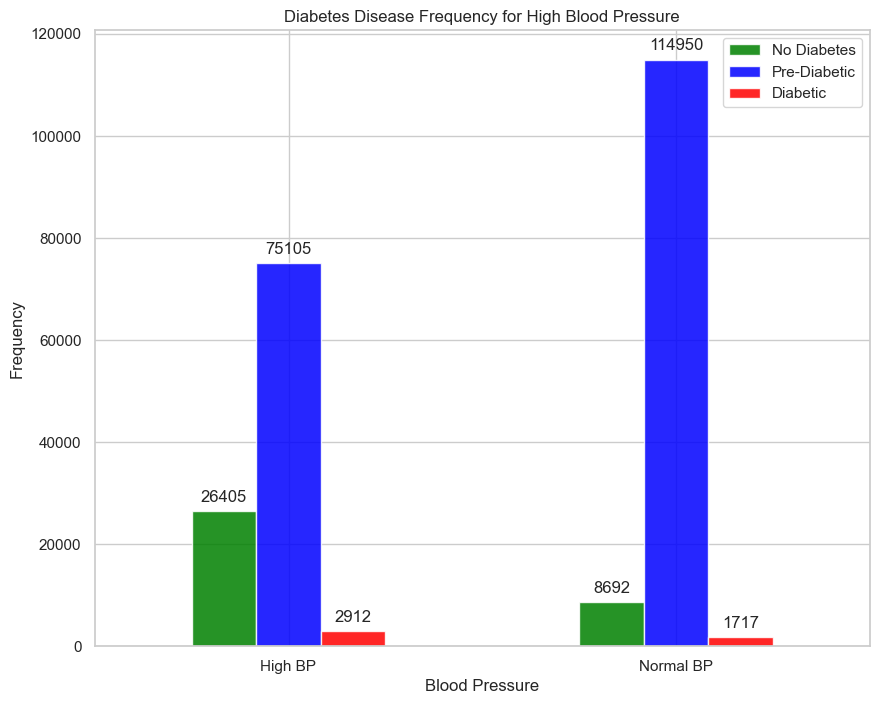

In [240]:
# Plotting diabetes frequency 
plot_diabetes_frequency('HighBP', 'Diabetes_012', 'Diabetes Disease Frequency for High Blood Pressure', 'Blood Pressure', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

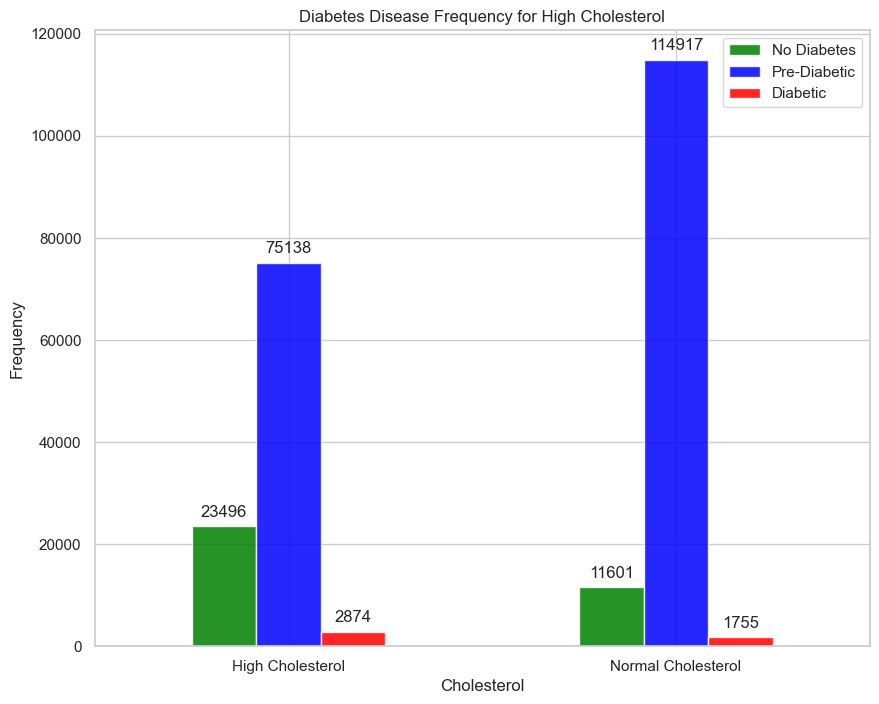

In [241]:
# Plotting diabetes frequency 
plot_diabetes_frequency('HighChol', 'Diabetes_012', 'Diabetes Disease Frequency for High Cholesterol', 'Cholesterol', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

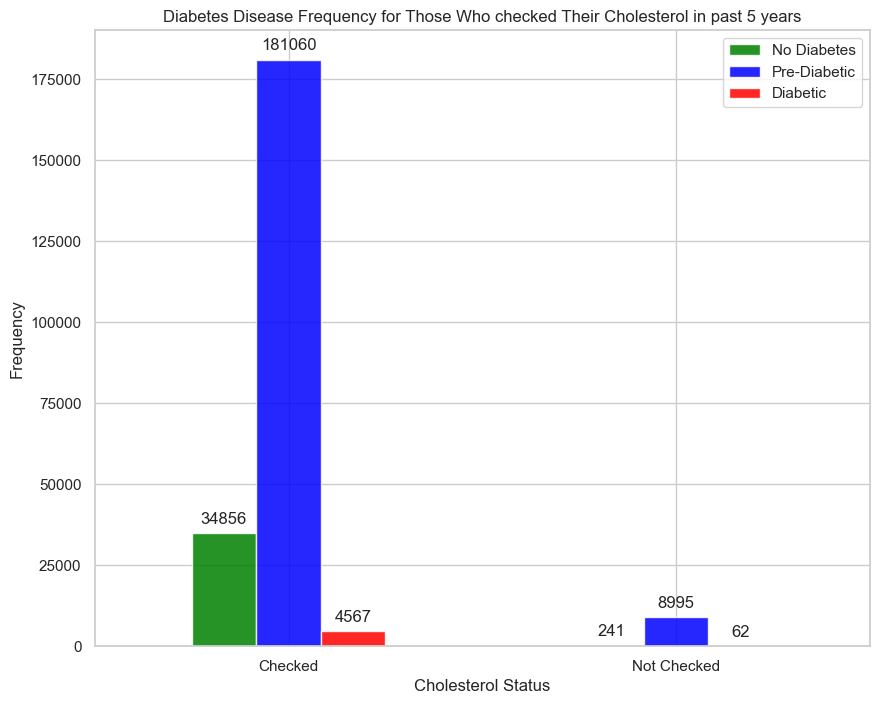

In [244]:
# Plotting diabetes frequency 
plot_diabetes_frequency('CholCheck', 'Diabetes_012', 'Diabetes Disease Frequency for Those Who checked Their Cholesterol in past 5 years', 'Cholesterol Status', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

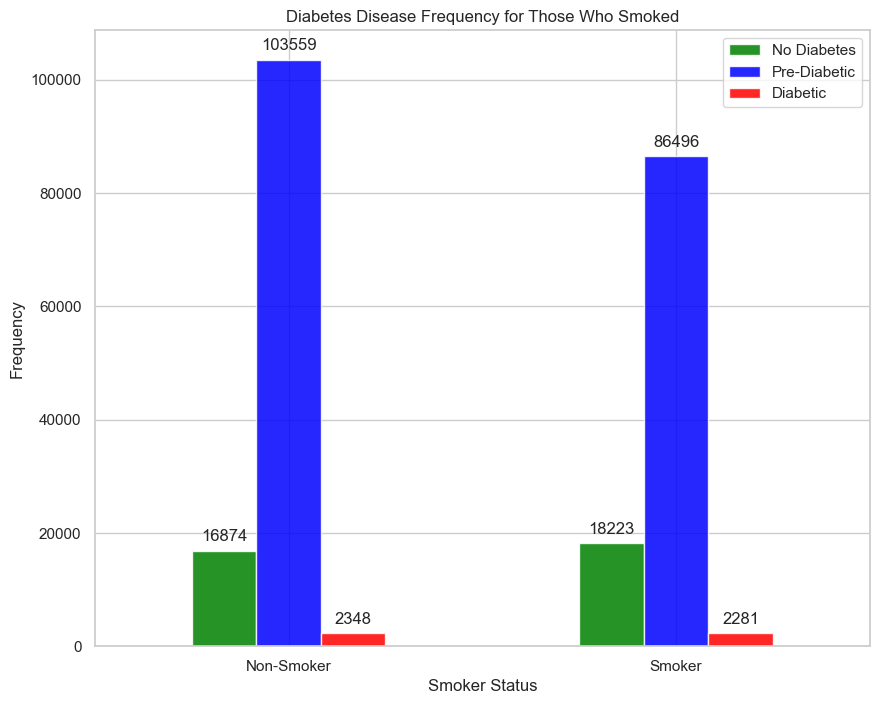

In [245]:
# Plotting diabetes frequency 
plot_diabetes_frequency('Smoker', 'Diabetes_012', 'Diabetes Disease Frequency for Those Who Smoked', 'Smoker Status', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

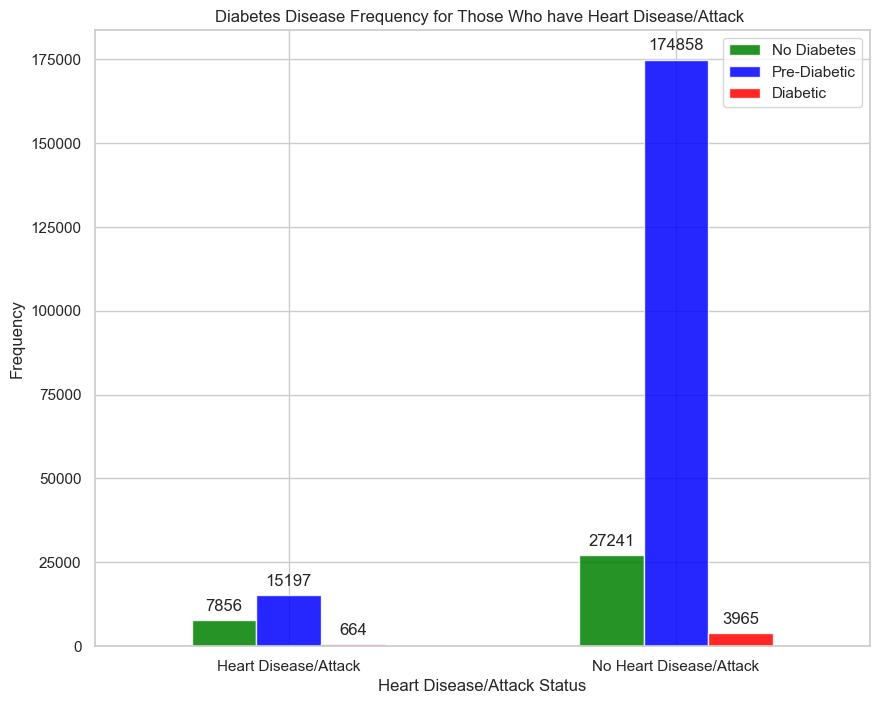

In [246]:
# Plotting diabetes frequency 
plot_diabetes_frequency('HeartDiseaseorAttack', 'Diabetes_012', 'Diabetes Disease Frequency for Those Who have Heart Disease/Attack ', 'Heart Disease/Attack Status', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

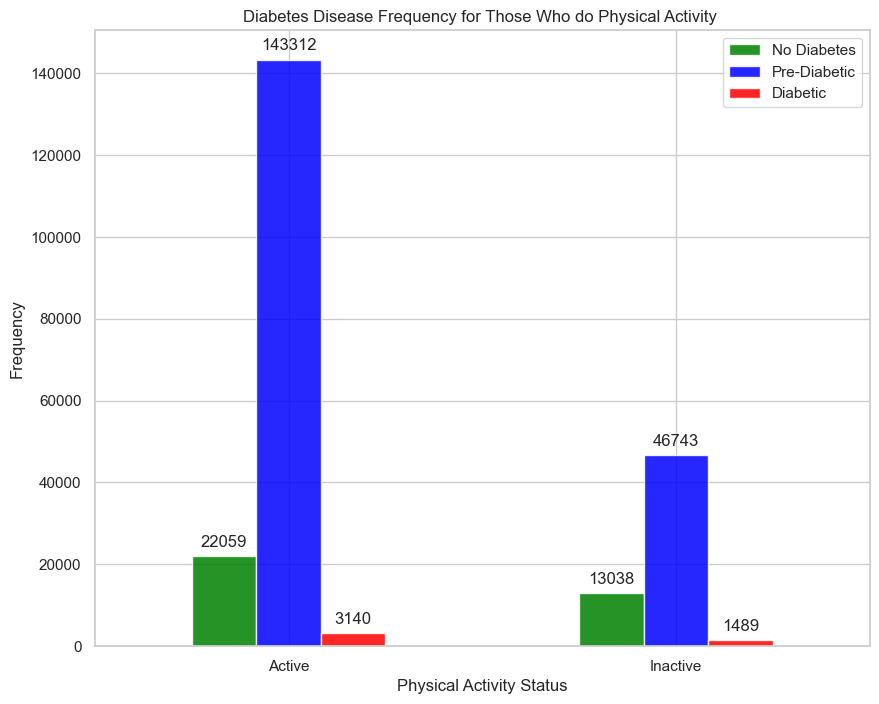

In [247]:
# Plotting diabetes frequency 
plot_diabetes_frequency('PhysActivity', 'Diabetes_012', 'Diabetes Disease Frequency for Those Who do Physical Activity ', 'Physical Activity Status', 'Frequency', ['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

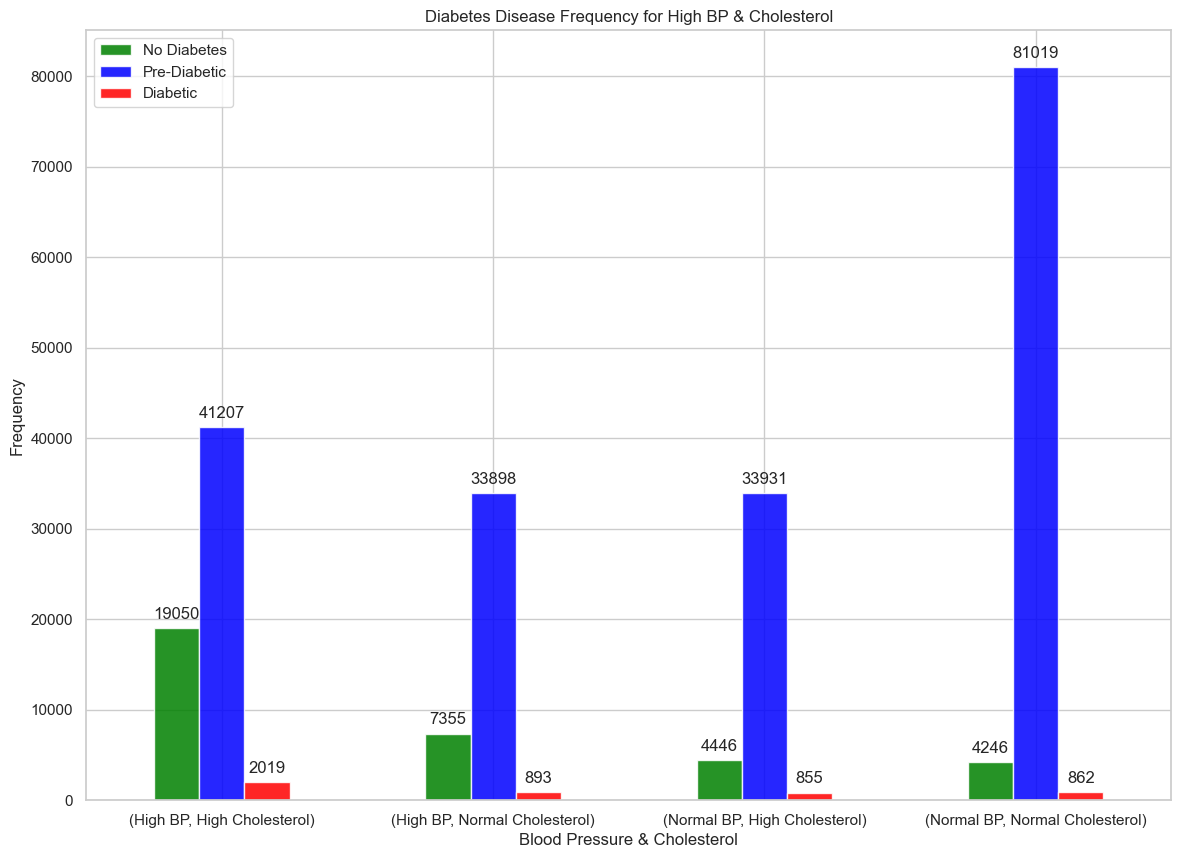

In [222]:
# Set the style using Seaborn
sns.set(style="whitegrid")
ct = pd.crosstab([final_df['HighBP'], final_df['HighChol']], final_df['Diabetes_012'])
ax = ct.plot(kind='bar', figsize=(14, 10), rot=0, alpha= 0.85, color=['Green', 'Blue', 'Red'])
plt.title('Diabetes Disease Frequency for High BP & Cholesterol')
plt.xlabel('Blood Pressure & Cholesterol')
plt.ylabel('Frequency')
plt.legend(['No Diabetes', 'Pre-Diabetic', 'Diabetic'])
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [224]:
# checking min and max of bmi col
final_df['BMI'].describe()

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

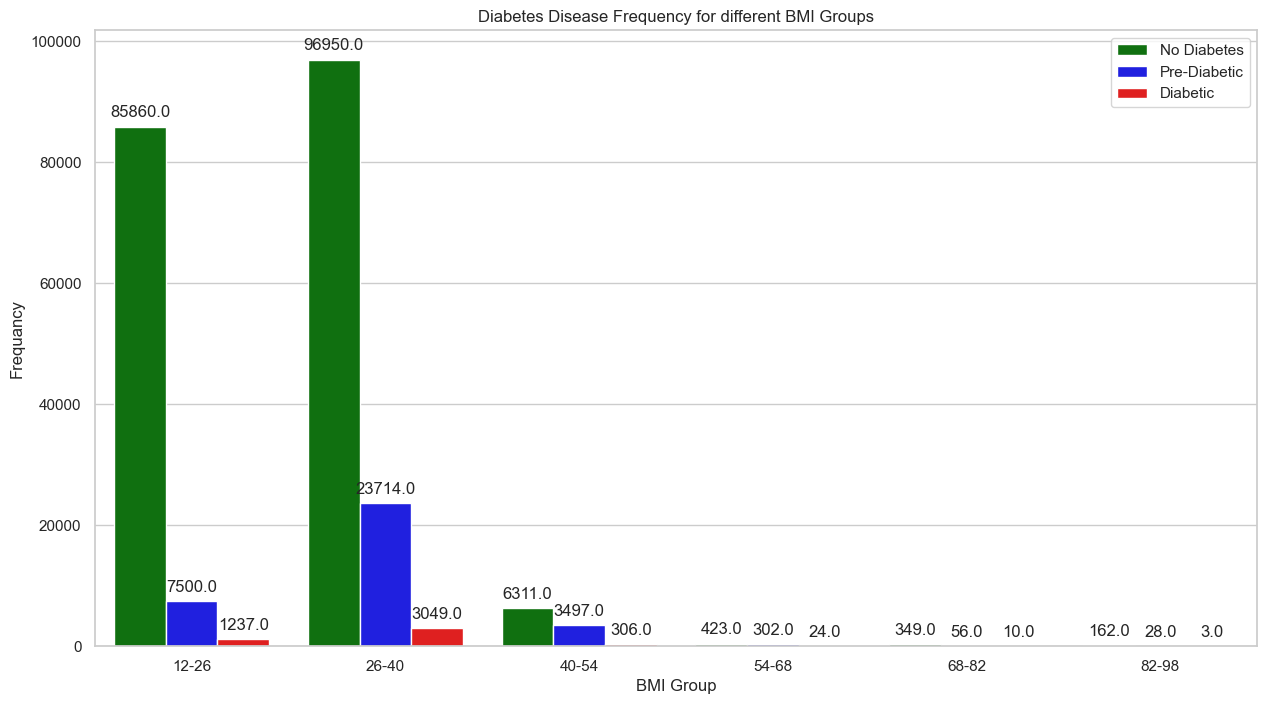

In [232]:
# Create bins for BMI values
bins = [12, 26, 40, 54, 68, 82, 98]
labels = ['12-26', '26-40', '40-54', '54-68', '68-82', '82-98']

# Create a new categorical variable 'BMI_Group' based on the bins
final_df['BMI_Group'] = pd.cut(final_df['BMI'], bins=bins, labels=labels, include_lowest=True)

# Set the style using Seaborn
sns.set(style="whitegrid")

# Create a count plot for BMI groups with different colors for each diabetes category
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=final_df, x='BMI_Group', hue='Diabetes_012', palette=['Green', 'Blue', 'Red'])
plt.title('Diabetes Disease Frequency for different BMI Groups')
plt.xlabel('BMI Group')
plt.ylabel('Frequancy')
plt.legend(['No Diabetes', 'Pre-Diabetic', 'Diabetic'])

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()